In [2]:
#-------------------------------------------------------------------
#
# Machine Learning script for feature extraction based on "Titanic_train.csv"
#-------------------------------------------------------------------

import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = pd.read_csv('Titanic_train.csv')

data = data[['pclass','sex','age','sibsp','fare','survived']]
data = data.dropna()
#print data.shape

#here I replace the 0 and 1s for died and survived
data.loc[data.survived == 0, 'survived'] = 'died'
data.loc[data.survived == 1, 'survived'] = 'survived'

#here I replace the 'female' and 'male' variable to make it numeric
data.loc[data.sex == 'male', 'sex'] = 1
data.loc[data.sex == 'female', 'sex'] = 0

#print data.head(5)

#X = data.iloc[:,np.r_[0,2:14]] # use np.r_ to select nonconsecutive columns
X = data.iloc[:,0:5] 
y = data.iloc[:,-1]    #target column i.e price range

# Variable X contains all the features, Variable Y contains the target 

#apply SelectKBest class to extract top 10 best features based on Univariate Selection
print ("Univariate selection")
print ("\n")
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(5,'Score'))  #print 5 best features

# Based on the SelectKBest algorithm the fare, sex, age, pclass, sibsp are the best 
# features in that order


Univariate selection


    Specs        Score
4    fare  4278.032489
1     sex    85.865658
2     age    32.491165
0  pclass    25.920561
3   sibsp     0.300368


Feature Importance


[0.11429555 0.28558537 0.28249539 0.03400025 0.28362345]


/Users/SammyChrisChris/anaconda2/envs/python3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


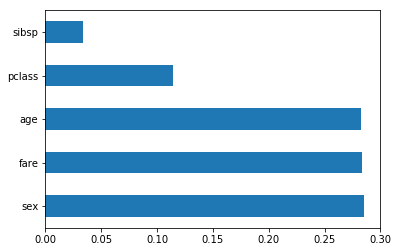

In [4]:
print ("Feature Importance")
print ("\n")

#You can get the feature importance of each feature of your dataset 
#by using the feature importance property of the model. Feature importance 
#gives you a score for each feature of your data, the higher the score more 
#important or relevant is the feature towards your output variable.

#Feature importance is an inbuilt class that comes with Tree Based Classifiers, 
#we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

# you can see that the data converge with the results from the univariate selection

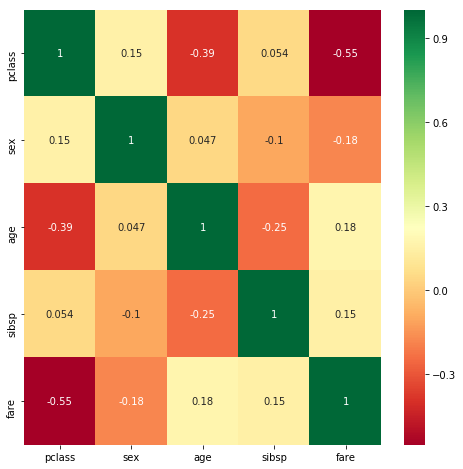

In [5]:
# Correlation Heat map to determine how the features are correlated to each other and the
# target variable
X = data.iloc[:,0:5] 
y = data.iloc[:,-1] 

import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(8,8))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.show()

# given that sex and our target variable survived are categorical, no correlation
# can be calculated for those variables